# BoomBikes 
## Multiple Linear Regression

#### Problem Statement:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

import NumPy and Pandas and read the BoomBikes dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
# Check the head of the dataset
data.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
720,721,22-12-2019,1,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,205,1544,1749
721,722,23-12-2019,1,1,12,0,0,0,1,10.079153,12.97355,51.5417,8.916561,408,1379,1787
722,723,24-12-2019,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
723,724,25-12-2019,1,1,12,1,2,0,2,11.943464,14.72325,73.4783,11.304642,440,573,1013
724,725,26-12-2019,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
# it can be seen instant just corresponds to row number and hence can be dropped
data.drop(['instant'], axis = 1, inplace = True)

In [7]:
# Drop 'casual' and 'registered' as their sum 'cnt' is the target variable so we cannot use these for prediction
data.drop(['casual', 'registered'], axis = 1, inplace = True)

In [8]:
#from the dteday field month and year are already available so will extract day and drop this variable
data['dteday'] = pd.to_datetime(data['dteday'],format="%d-%m-%Y")
data['day'] = pd.DatetimeIndex(data['dteday']).day
data.drop(['dteday'], axis = 1, inplace = True)

## will check if day variable has any helpful information

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

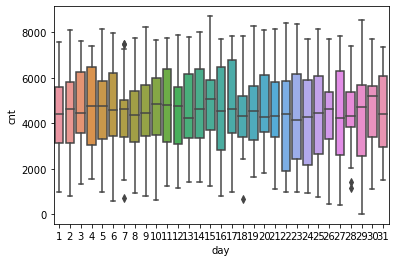

In [10]:
#visualize day variable
sns.boxplot(x = 'day', y = 'cnt', data = data)
plt.show()

In [11]:
# can't see much differentiation based on day variable so will drop it
data.drop(['day'], axis = 1, inplace = True)

## Inspect the various aspects of the data

In [12]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
data.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796
729,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,2729


In [14]:
data.shape

(730, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [16]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [17]:
numeric = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

#### Visualising Numeric Variables

pairplot of all the numeric variables

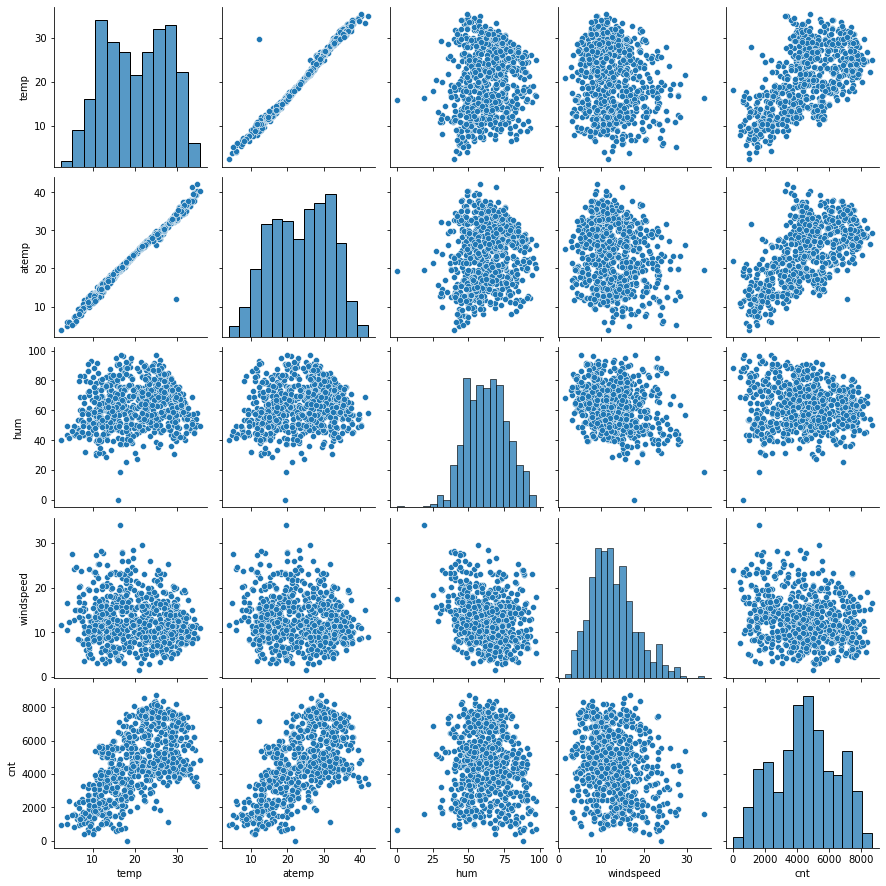

In [18]:
sns.pairplot(data[numeric])
plt.show()

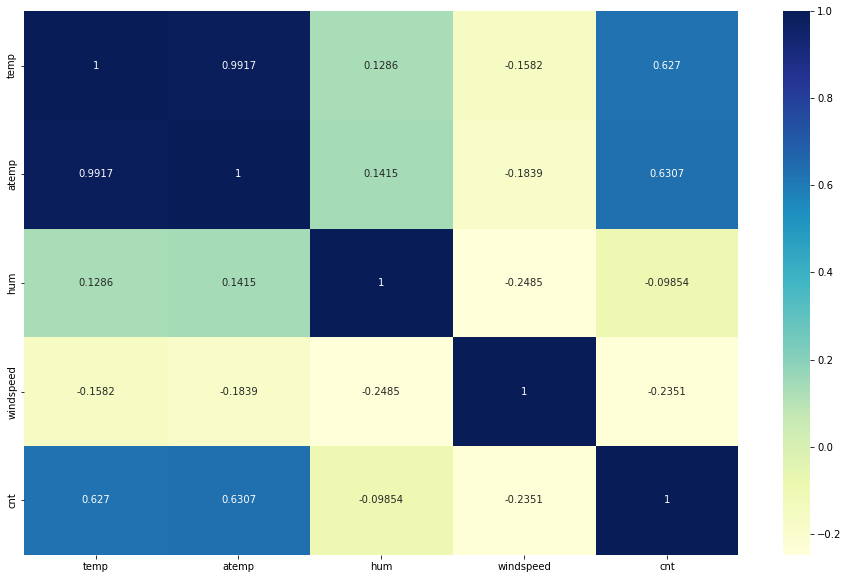

In [19]:
#check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data[numeric].corr(), annot = True, fmt='.4g', cmap="YlGnBu")
plt.show()

it can be seen that temp and atemp are very highly correlated so it only makes sense to keep one <br>
atemp has a higher correlation of 0.6307 with cnt <br>
and from a business sense feeling temperature makes more sense than just temperature <br>
so will drop temp variable <br> <br>

windspeed shows slight correlation of -0.24 while humidity has very minimal correlation of -.1, will explore these further to see if they add any additional information in multiple linear regression

In [20]:
# drop temp col
data.drop(['temp'], axis = 1, inplace = True)

#### Visualising Categorical Variables

make a boxplot for categorical variables.

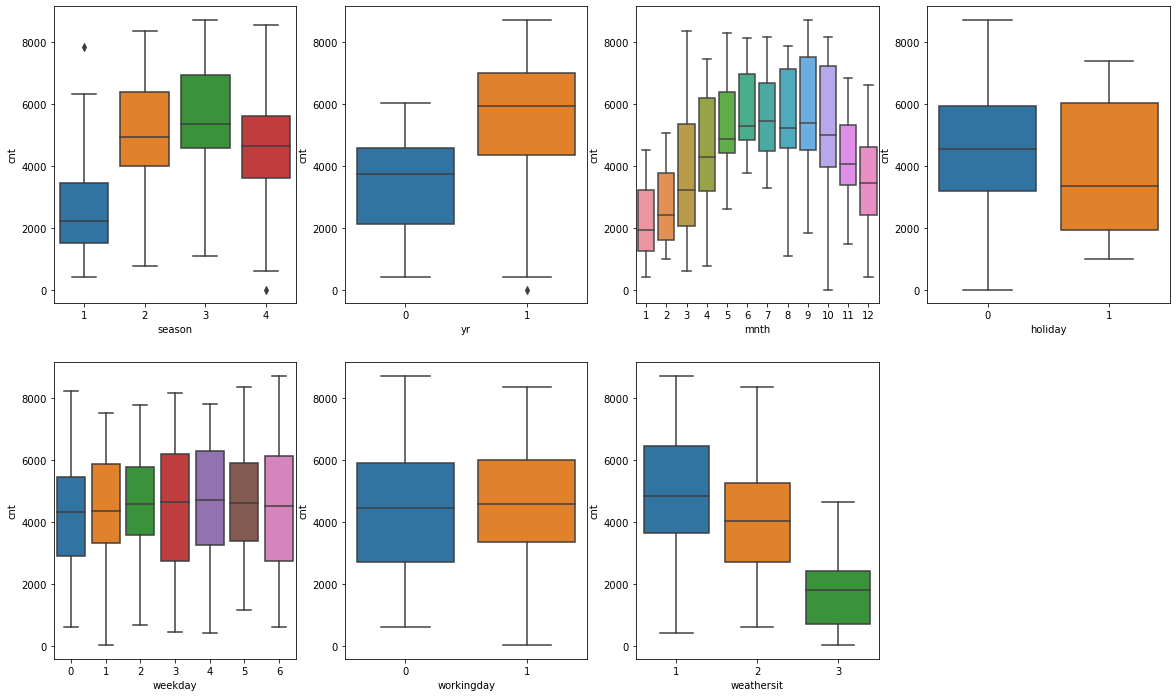

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

### Categorical Variable interpretation
Season: Spring (1) seems to clearly have very low ridership compared all other seasons <br>
Yr: 2019 had on average much higher ridership then 2018 <br>
mnth: january has the lowest ridership and then it keeps gradually increasing every month until May from which it remains elevated until October after which it again tapers off <br>
holiday: not much difference can be seen <br>
weekday: not much differentiation can be seen <br>
workingday: not much differentiation can be seen <br>
weathersit: for level 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) lowest ridership is seen

We visualise season and weathersit together by using the `hue` argument to see if there is any interaction.

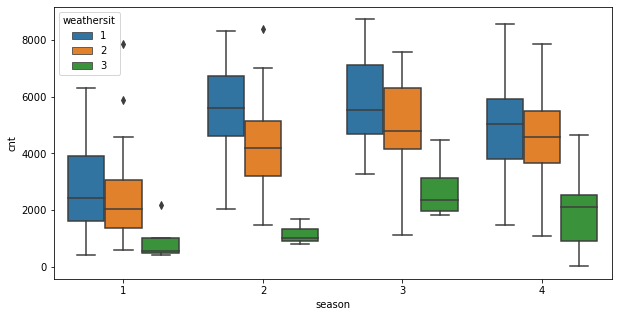

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = data)
plt.show()

it can be seen that no interaction is present as the behavior does not change for either variable in presence of the other

## Step 3: Data Preparation

we look at unique values for some categorical variables

In [23]:
for x in categorical:
  print(x, "\n", data[x].value_counts())

season 
 3    188
2    184
1    180
4    178
Name: season, dtype: int64
yr 
 0    365
1    365
Name: yr, dtype: int64
mnth 
 1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
holiday 
 0    709
1     21
Name: holiday, dtype: int64
weekday 
 6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
workingday 
 1    499
0    231
Name: workingday, dtype: int64
weathersit 
 1    463
2    246
3     21
Name: weathersit, dtype: int64


### Dummy Variables

from above we can see that dummy variables are required for following categorical variables season, mnth, weekday and weathersit <br>
for rest they already have 0 and 1 values

In [24]:
data['season'].head()

0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64

In [25]:
# create dummy variables
season = pd.get_dummies(data['season'], prefix="season", drop_first = True)
mnth = pd.get_dummies(data['mnth'], prefix="mnth", drop_first = True)
weekday = pd.get_dummies(data['weekday'], prefix="weekday", drop_first = True)
weathersit = pd.get_dummies(data['weathersit'], prefix="weathersit", drop_first = True)

In [26]:
# Check what the dataset 'season' looks like
season.head()

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [27]:
# Add the results to the original dataframe

data = pd.concat([data,season, mnth, weekday, weathersit], axis = 1)

In [28]:
# Now let's see the head of our dataframe.

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,...,0,0,0,0,1,0,0,0,0,0


## Feature Engineering

In [29]:
#create a flag for only months 5 to 10 when ridership is seen to be higher than other months

data.loc[((data['mnth'] >= 5) 
       &(data['mnth'] <= 10)), 'mnth5to10'] = 1

data['mnth5to10'] = data['mnth5to10'].fillna(0)

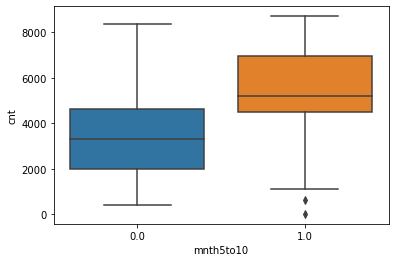

In [30]:
sns.boxplot(x = 'mnth5to10', y = 'cnt', data = data)
plt.show()

In [31]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,mnth5to10
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,23.726322,62.765175,12.763620,...,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767,0.504110
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,8.150308,14.237589,5.195841,...,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266,0.500326
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.953480,0.000000,1.500244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,16.889713,52.000000,9.041650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,24.368225,62.625000,12.125325,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,30.445775,72.989575,15.625589,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,42.044800,97.250000,34.000021,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Drop categorical variables for which we have created the dummies

data.drop(['season', 'mnth', 'weathersit', 'weekday'], axis = 1, inplace = True)

## Step 4: Splitting the Data into Training and Testing Sets

In [33]:
from sklearn.model_selection import train_test_split

# set seed
np.random.seed(123)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 123)

### Rescaling the Features 

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
# Apply scaler() to all the numeric columns 
numeric = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[numeric] = scaler.fit_transform(df_train[numeric])

In [37]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,mnth5to10
689,1,0,1,0.382473,0.631105,0.131013,0.600492,0,0,1,...,0,0,0,1,0,0,0,0,0,0.0
406,1,0,0,0.176364,0.751928,0.532059,0.251611,0,0,0,...,0,0,0,0,0,0,1,0,1,0.0
299,0,0,1,0.505788,0.835904,0.334206,0.309036,0,0,1,...,0,0,0,0,1,0,0,1,0,1.0
142,0,0,1,0.684097,0.832905,0.411769,0.498301,1,0,0,...,0,1,0,0,0,0,0,1,0,1.0
275,0,0,1,0.418809,0.782348,0.088231,0.415797,0,0,1,...,0,1,0,0,0,0,0,1,0,1.0


In [38]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,mnth5to10
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.523529,0.037255,0.686275,0.514277,0.633319,0.322474,0.524341,0.254902,0.237255,0.235294,...,0.094118,0.149020,0.147059,0.147059,0.147059,0.133333,0.147059,0.311765,0.033333,0.476471
std,0.499936,0.189572,0.464462,0.218066,0.146670,0.165343,0.234835,0.436234,0.425818,0.424599,...,0.292279,0.356457,0.354512,0.354512,0.354512,0.340268,0.354512,0.463669,0.179682,0.499936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.327562,0.520835,0.203184,0.357055,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.525660,0.631320,0.302796,0.534279,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.691717,0.736462,0.411435,0.710887,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

### RFE
start with RFE model

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10) 
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 8),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', False, 6),
 ('hum', False, 7),
 ('windspeed', False, 9),
 ('season_2', False, 12),
 ('season_3', False, 13),
 ('season_4', False, 11),
 ('mnth_2', False, 20),
 ('mnth_3', False, 18),
 ('mnth_4', False, 19),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 15),
 ('mnth_12', False, 16),
 ('weekday_1', False, 5),
 ('weekday_2', False, 2),
 ('weekday_3', False, 3),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 14),
 ('weathersit_2', False, 17),
 ('weathersit_3', False, 10),
 ('mnth5to10', True, 1)]

In [43]:
#only keep selected variables by RFE
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'weekday_4', 'weekday_5', 'mnth5to10'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### round 1

RFE features selected = 10

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#summary of the linear model
print(lm.summary())
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     28.48
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           5.92e-40
Time:                        20:59:30   Log-Likelihood:                 121.30
No. Observations:                 510   AIC:                            -222.6
Df Residuals:                     500   BIC:                            -180.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3890      0.013     29.537      0.0

,Features,VIF
2,mnth_5,inf
3,mnth_6,inf
4,mnth_7,inf
5,mnth_8,inf
6,mnth_9,inf
7,mnth_10,inf
10,mnth5to10,inf
0,const,2.38
8,weekday_4,1.04
9,weekday_5,1.04


VIF is inf as mnth5to10 maps to the mnth_5 to mnth_10 vars so cannot use this, will try RFE with 5 variables 

### round 2

RFE features selected = 5

In [45]:
# Running RFE with the output number of the variable equal to 5
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=5) 
rfe = rfe.fit(X_train, y_train)
#only keep selected variables by RFE
col = X_train.columns[rfe.support_]
col

Index(['mnth_6', 'mnth_7', 'mnth_9', 'mnth_10', 'mnth5to10'], dtype='object')

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#summary of the linear model
print(lm.summary())
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     49.63
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           8.94e-42
Time:                        20:59:30   Log-Likelihood:                 117.85
No. Observations:                 510   AIC:                            -223.7
Df Residuals:                     504   BIC:                            -198.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3977      0.012     33.643      0.0

,Features,VIF
5,mnth5to10,1.92
0,const,1.91
4,mnth_10,1.36
2,mnth_7,1.34
1,mnth_6,1.32
3,mnth_9,1.31


### try building model using trends observed in data visualization and business sense

RFE seems to be missing the business intuitive variables like atemp, yr, weathersit etc. that were identified in data visualization will try using those variables as well 

### Round 3

In [47]:
#based on the trends observed in data visualization exercise select the following variables to start 
col = ['yr','holiday','atemp','weathersit_3','mnth5to10']


In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_manual = X_train[col]
# Adding a constant variable 
X_train_manual = sm.add_constant(X_train_manual)
lm = sm.OLS(y_train,X_train_manual).fit()   # Running the linear model
#summary of the linear model
print(lm.summary())
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_manual
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     302.3
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.05e-149
Time:                        20:59:30   Log-Likelihood:                 369.20
No. Observations:                 510   AIC:                            -726.4
Df Residuals:                     504   BIC:                            -701.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1069      0.016      6.593   

,Features,VIF
0,const,9.63
3,atemp,2.64
5,mnth5to10,2.62
1,yr,1.02
4,weathersit_3,1.02
2,holiday,1.00


while all variables have p value < 0.05 VIF is high for the constant signifying that const is explained well by other variables so in next round will try without constant

### Round 4

In [49]:
#estimate with same variables but without constant

# Creating X_test dataframe with RFE selected variables
X_train_manual = X_train[col]
lm = sm.OLS(y_train,X_train_manual).fit()   # Running the linear model
#summary of the linear model
print(lm.summary())
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_manual
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2128.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:59:30   Log-Likelihood:                          348.10
No. Observations:                 510   AIC:                                     -686.2
Df Residuals:                     505   BIC:                                     -665.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

,Features,VIF
2,atemp,5.63
4,mnth5to10,3.96
0,yr,1.98
1,holiday,1.04
3,weathersit_3,1.03


we can see that mnth5to10 has become insignificant so will try removing this variable

### Round 5

In [50]:
col = ['yr','holiday','atemp','weathersit_3']

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_manual = X_train[col]
lm = sm.OLS(y_train,X_train_manual).fit()   # Running the linear model
#summary of the linear model
print(lm.summary())
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_manual
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2648.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:59:30   Log-Likelihood:                          346.50
No. Observations:                 510   AIC:                                     -685.0
Df Residuals:                     506   BIC:                                     -668.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

,Features,VIF
2,atemp,1.95
0,yr,1.90
1,holiday,1.03
3,weathersit_3,1.02


## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [52]:
y_train_pred = lm.predict(X_train_manual)

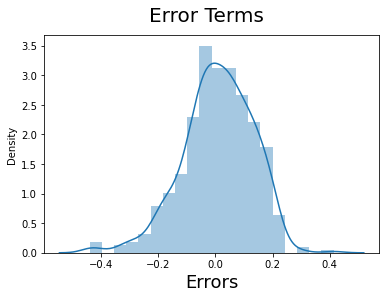

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Step 7: Making Predictions Using the selected Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [54]:
# Apply scaler() to all the numeric columns 
numeric = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[numeric] = scaler.transform(df_test[numeric])

In [55]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,mnth5to10
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.442922,0.009132,0.680365,0.562858,0.673041,0.309480,0.527862,0.242009,0.305936,0.264840,...,0.063927,0.132420,0.132420,0.127854,0.132420,0.164384,0.132420,0.397260,0.018265,0.566210
std,0.497869,0.095344,0.467403,0.214910,0.142423,0.170279,0.207631,0.429281,0.461858,0.442259,...,0.245183,0.339723,0.339723,0.334692,0.339723,0.371472,0.339723,0.490452,0.134214,0.496732
min,0.000000,0.000000,0.000000,0.026455,0.261354,-0.042808,0.068323,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.398090,0.570051,0.182131,0.397398,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.581008,0.677807,0.292758,0.522911,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.749978,0.772065,0.407056,0.654518,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.019437,0.975076,0.858328,1.018634,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [56]:
y_test = df_test.pop('cnt')
X_test = df_test

In [57]:
# Adding constant variable to test dataframe
#X_test_m4 = sm.add_constant(X_test)

In [58]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_new = X_test[col]

In [59]:
# Making predictions using the fourth model

y_pred = lm.predict(X_test_new)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

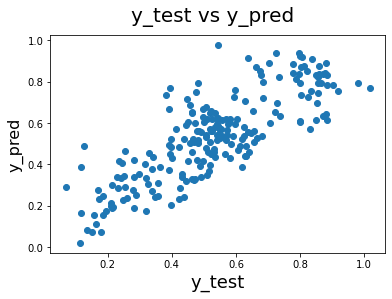

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### R-squared score on the test set

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6165312763054072

#### it can be seen that there is overfitting given the high difference in r Square between train and test, so will explore further options

### Round 6

In [62]:
col = ['yr','atemp','weathersit_3','workingday']
# Creating X_test dataframe with RFE selected variables
X_train_manual = X_train[col]
# Adding a constant variable 
#X_train_manual = sm.add_constant(X_train_manual)
lm = sm.OLS(y_train,X_train_manual).fit()   # Running the linear model
#summary of the linear model
print(lm.summary())
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_manual
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              2693.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:59:31   Log-Likelihood:                          350.65
No. Observations:                 510   AIC:                                     -693.3
Df Residuals:                     506   BIC:                                     -676.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

,Features,VIF
1,atemp,3.11
3,workingday,2.58
0,yr,1.94
2,weathersit_3,1.03


In [63]:
X_test_new = X_test[col]
y_pred = lm.predict(X_test_new)
r2_score(y_test, y_pred)

0.6286538250805496

### Round 7

In [64]:
col = ['yr','atemp','weathersit_3','workingday','windspeed']
# Creating X_test dataframe with RFE selected variables
X_train_manual = X_train[col]
# Adding a constant variable 
#X_train_manual = sm.add_constant(X_train_manual)
lm = sm.OLS(y_train,X_train_manual).fit()   # Running the linear model
#summary of the linear model
print(lm.summary())
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_manual
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              2154.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:59:31   Log-Likelihood:                          351.10
No. Observations:                 510   AIC:                                     -692.2
Df Residuals:                     505   BIC:                                     -671.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

,Features,VIF
1,atemp,3.78
4,windspeed,3.05
3,workingday,2.79
0,yr,2.00
2,weathersit_3,1.07


In [65]:
X_test_new = X_test[col]
y_pred = lm.predict(X_test_new)
r2_score(y_test, y_pred)

0.6282370977229985

### Round 8

In [66]:
col = ['yr','atemp','weathersit_3','workingday','season_2','season_4']
# Creating X_test dataframe with RFE selected variables
X_train_manual = X_train[col]
# Adding a constant variable 
#X_train_manual = sm.add_constant(X_train_manual)
lm = sm.OLS(y_train,X_train_manual).fit()   # Running the linear model
#summary of the linear model
print(lm.summary())
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_manual
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2333.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:59:31   Log-Likelihood:                          415.69
No. Observations:                 510   AIC:                                     -819.4
Df Residuals:                     504   BIC:                                     -794.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

,Features,VIF
1,atemp,3.52
3,workingday,2.63
0,yr,1.98
4,season_2,1.50
5,season_4,1.35
2,weathersit_3,1.06


In [67]:
X_test_new = X_test[col]
y_pred = lm.predict(X_test_new)
r2_score(y_test, y_pred)

0.7097146905536946

### Round 9

In [68]:
col = ['yr','atemp','weathersit_3','weathersit_2','workingday','season_2','season_4']
# Creating X_test dataframe with RFE selected variables
X_train_manual = X_train[col]
# Adding a constant variable 
#X_train_manual = sm.add_constant(X_train_manual)
lm = sm.OLS(y_train,X_train_manual).fit()   # Running the linear model
#summary of the linear model
print(lm.summary())
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_manual
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2155.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:59:31   Log-Likelihood:                          434.66
No. Observations:                 510   AIC:                                     -855.3
Df Residuals:                     503   BIC:                                     -825.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

,Features,VIF
1,atemp,3.57
4,workingday,2.70
0,yr,1.99
5,season_2,1.50
3,weathersit_2,1.39
6,season_4,1.37
2,weathersit_3,1.07


In [69]:
X_test_new = X_test[col]
y_pred = lm.predict(X_test_new)
r2_score(y_test, y_pred)

0.7452986355315147

### Round 10 - Alternate 1 without intercept

In [70]:
col = ['yr','atemp','weathersit_3','weathersit_2','workingday','season_2','season_4','mnth_9']
# Creating X_test dataframe with RFE selected variables
X_train_manual = X_train[col]
# Adding a constant variable 
#X_train_manual = sm.add_constant(X_train_manual)
lm = sm.OLS(y_train,X_train_manual).fit()   # Running the linear model
#summary of the linear model
print(lm.summary())
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_manual
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1986.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:59:31   Log-Likelihood:                          447.91
No. Observations:                 510   AIC:                                     -879.8
Df Residuals:                     502   BIC:                                     -845.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

,Features,VIF
1,atemp,3.81
4,workingday,2.71
0,yr,1.99
5,season_2,1.57
3,weathersit_2,1.39
6,season_4,1.37
7,mnth_9,1.16
2,weathersit_3,1.07


#### it can be seen that all selected model variables are significant ( p value less than 0.05)
#### F Statistic shows overall model equation is significant
#### VIF for all variables is less than 5 implying no multicollinearity

### Residual Analysis

In [71]:
y_train_pred = lm.predict(X_train_manual)

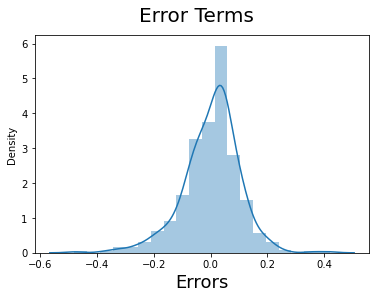

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### error distribution is centered around 0 and seems close to a normal distribution

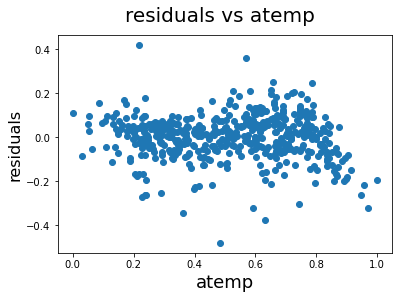

In [73]:
# Plotting residual vs atemp to see if there are any visible patterns in residual
fig = plt.figure()
plt.scatter(X_train['atemp'],y_train - y_train_pred)
fig.suptitle('residuals vs atemp', fontsize=20)            
plt.xlabel('atemp', fontsize=18)                         
plt.ylabel('residuals', fontsize=16)                      
plt.show()

#### the error terms appear to be evenly distributed noise around zero, though for higher atemp a bit of downward trend is seen

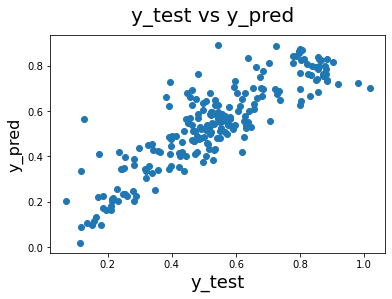

In [74]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

good trend is seen between actual and predicted

### R-squared score on the test set for Alternate Model

In [75]:
X_test_new = X_test[col]
y_pred = lm.predict(X_test_new)
r2_score(y_test, y_pred)

0.7647914670428624

high difference in rsquare is seen between train 96% and test 76% signifying overfitting, as a result will go and include intercept even though it has high VIF

### Round 11 -  Final Model with intercept 

In [76]:
col = ['yr','atemp','weathersit_3','weathersit_2','workingday','season_2','season_4','mnth_9']
# Creating X_test dataframe with RFE selected variables
X_train_manual = X_train[col]
# Adding a constant variable 
X_train_manual = sm.add_constant(X_train_manual)
lm = sm.OLS(y_train,X_train_manual).fit()   # Running the linear model
#summary of the linear model
print(lm.summary())
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_manual
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     281.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          7.00e-180
Time:                        20:59:32   Log-Likelihood:                 450.15
No. Observations:                 510   AIC:                            -882.3
Df Residuals:                     501   BIC:                            -844.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0318      0.015      2.106   

,Features,VIF
0,const,11.39
6,season_2,1.18
7,season_4,1.15
2,atemp,1.14
8,mnth_9,1.09
3,weathersit_3,1.05
4,weathersit_2,1.04
1,yr,1.02
5,workingday,1.01


#### it can be seen that all selected model variables are significant ( p value less than 0.05)
#### F Statistic shows overall model equation is significant
#### VIF for all variables except constant is less than 5 implying no multicollinearity
#### The Durbin Watson statistic of 2 implies no autocorrelation, the value of 2.135 implies only slight negative autocorrelation.

### Check Linearity

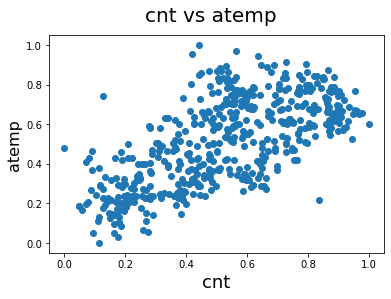

In [77]:
# Plotting cnt vs atemp to check linear relationship
fig = plt.figure()
plt.scatter(y_train, X_train['atemp'])
fig.suptitle('cnt vs atemp', fontsize=20)            
plt.xlabel('cnt', fontsize=18)                         
plt.ylabel('atemp', fontsize=16)                      
plt.show()

### Residual Analysis

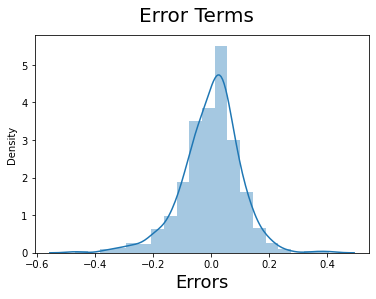

In [78]:
# Plot the histogram of the error terms
y_train_pred = lm.predict(X_train_manual)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### error distribution is centered around 0 and seems close to a normal distribution

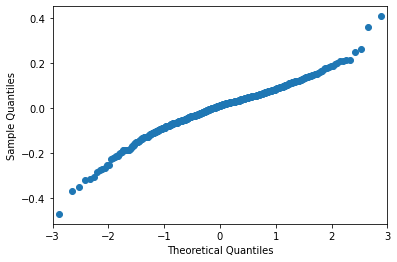

In [79]:
# QQ plot to check if residuals are normally distributed
sm.qqplot(y_train - y_train_pred)
plt.show()

#### the error terms appears to be close to the normal distribution

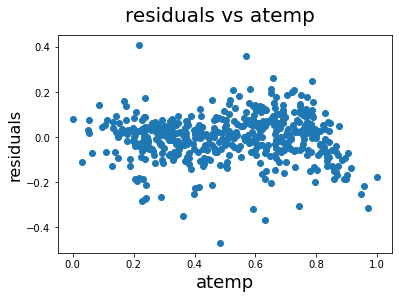

In [80]:
# Plotting residual vs atemp to see if there are any visible patterns in residual
fig = plt.figure()
plt.scatter(X_train['atemp'],y_train - y_train_pred)
fig.suptitle('residuals vs atemp', fontsize=20)            
plt.xlabel('atemp', fontsize=18)                         
plt.ylabel('residuals', fontsize=16)                      
plt.show()

#### the error terms appear to be evenly distributed noise around zero, though for higher atemp a bit of downward trend is seen

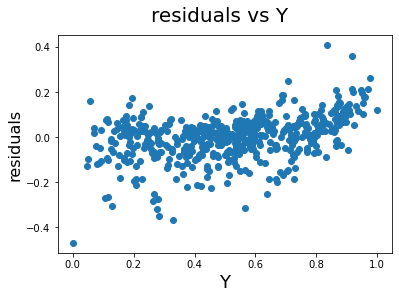

In [81]:
# Plotting residual vs atemp to see if there are any visible patterns in residual
fig = plt.figure()
plt.scatter(y_train,y_train - y_train_pred)
fig.suptitle('residuals vs Y', fontsize=20)            
plt.xlabel('Y', fontsize=18)                         
plt.ylabel('residuals', fontsize=16)                      
plt.show()

#### the error terms appear to be evenly distributed noise around zero, though for higher Y a bit of upward trend is seen
#### hence no heteroscedasticity is seen and autocorrelation is also negligible

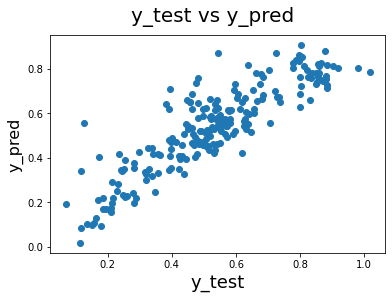

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

good trend is seen between actual and predicted

### R-squared score on the test set for Final Model with intercept

In [83]:
X_test_new = X_test[col]
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)
r2_score(y_test, y_pred)

0.7722063167063323

rsquare is comparable between train 81% and test 77% signifying no overfitting

## Observations


We can see that the equation of our best fitted line is:

$ total ride count = 0.0318 + 0.631  \times  atemp - 0.2632  \times  weathersit_3 + 0.2348 \times year + 0.1371 \times season_4(winter) + 0.0971 \times mnth_9 + 0.0775 \times season_2 (summer) - 0.06869 \times weathersit_2 $

based on R Score on test sample this model can be assumed to explain roughly 77% of the variance seen in daily ridership <br>
the feeling temperature is the most important determinant of ridership with higher temperature generally seeing higher ridership <br>
as weather situation becomes worse ridership falls, highest fall being in case of weather situation 3 <br>
it can also be seen that ridership increased in 2019 compared to 2018 all other factors being constant <br>
winter and summer see increased ridership

